In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

np.random.seed(20201227)
tf.set_random_seed(20201227)
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
num_units = 1024

x = tf.placeholder(tf.float32, [None, 784])

w1 = tf.Variable(tf.truncated_normal([784, num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.relu(tf.matmul(x, w1) + b1)

w0 = tf.Variable(tf.zeros([num_units, 10]))
b0 = tf.Variable(tf.zeros([10]))

p = tf.nn.softmax(tf.matmul(hidden1, w0) + b0) # ブロードキャストルール

In [3]:
# --- 損失関数を定義 ---
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
train_step = tf.train.AdamOptimizer().minimize(loss)
# 正解率
correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [4]:
# --- パラメータの最適化 ---
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
i = 0
for _ in range(2000):
    i += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, t:batch_ts})
    if (i % 100 == 0):
        loss_val, acc_val = sess.run([loss, accuracy], feed_dict={x:mnist.test.images, t:mnist.test.labels})
        print('Step: %d, Loss: %f, Accuracy: %f'% (i, loss_val, acc_val))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Step: 100, Loss: 2762.851807, Accuracy: 0.915200
Step: 200, Loss: 2203.078613, Accuracy: 0.933900
Step: 300, Loss: 1826.884277, Accuracy: 0.944500
Step: 400, Loss: 1736.956909, Accuracy: 0.949600
Step: 500, Loss: 1456.594971, Accuracy: 0.956500
Step: 600, Loss: 1339.814697, Accuracy: 0.960800
Step: 700, Loss: 1378.417725, Accuracy: 0.959900
Step: 800, Loss: 1263.546631, Accuracy: 0.963400
Step: 900, Loss: 1177.325317, Accuracy: 0.964400
Step: 1000, Loss: 1343.600464, Accuracy: 0.959800
Step: 1100, Loss: 1125.408325, Accuracy: 0.966500
Step: 1200, Loss: 1331.191650, Accuracy: 0.961100
Step: 1300, Loss: 1104.629150, Accuracy: 0.965900
Step: 1400, Loss: 1135.738159, Accuracy: 0.967800
Step: 1500, Loss: 1088.993164, Accuracy: 0.967400
Step: 1600, Loss: 1160.070923, Accuracy: 0.967000
Step: 1700, Loss: 976.292725, Accuracy: 0.970200
Step: 1800, Loss: 1050.634766, Accuracy: 0.968500
Step: 1900, Loss: 1031.794678, Accur

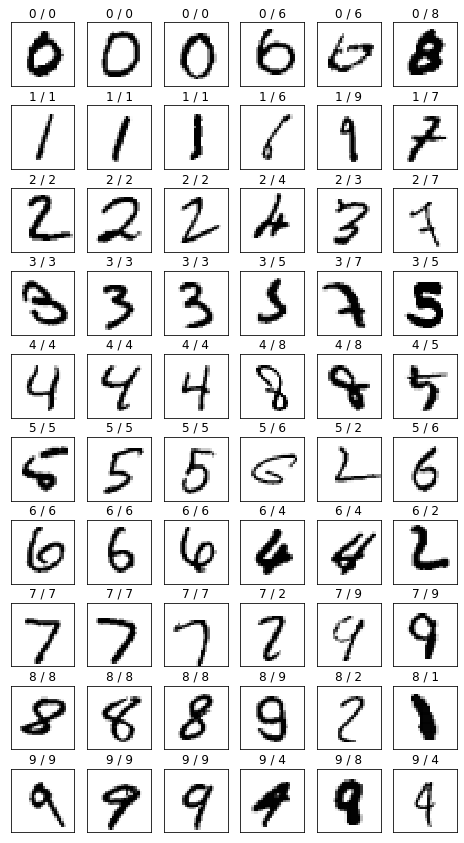

In [5]:
images, labels = mnist.test.images, mnist.test.labels
p_val = sess.run(p, feed_dict={x:images, t:labels})

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, p_val):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if (prediction != i):
            continue
        if ((c < 4 and i == actual) or (c >= 4 and i != actual)):
            subplot = fig.add_subplot(10, 6, i * 6 + c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d'%(prediction, actual))
            subplot.imshow(image.reshape((28, 28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if (c > 6):
                break